In [1]:
import numpy as np
import dask
import netCDF4 as nc
import matplotlib.pyplot as plt
import os
from os.path import isfile
import datetime as dt
from salishsea_tools import evaltools as et, viz_tools
import glob
%matplotlib inline

In [2]:
meshPath='/ocean/eolson/MEOPAR/NEMO-forcing/grid/mesh_mask201702_noLPE.nc'
maskName='tmask'

In [3]:
j0=230;j1=470;i0=0;i1=200;

In [4]:
with nc.Dataset(meshPath) as mesh:
    tmask=np.copy(mesh.variables['tmask'][:,:,j0:j1,i0:i1])
    e3t=np.copy(mesh.variables['e3t_0'][:,:,j0:j1,i0:i1])

In [5]:
flistmuZ=et.index_model_files(dt.datetime(2015,6,1),dt.datetime(2015,9,1),
                             '/data/eolson/results/MEOPAR/SS36runs/CedarRuns/testmuZ/',
                             'long',10,'ptrc_T',1)

first file starts on  2015-05-31 00:00:00


In [6]:
flistmuZ['t_0'][0],flistmuZ['t_n'][len(flistmuZ)-1]

(datetime.datetime(2015, 5, 31, 0, 0), datetime.datetime(2015, 9, 8, 0, 0))

In [7]:
flistHC=et.index_model_files(flistmuZ['t_0'][0],flistmuZ['t_n'][len(flistmuZ)-1]-dt.timedelta(days=1),
                             '/results/SalishSea/hindcast.201905/',
                             'nowcast',1,'ptrc_T',1)

In [8]:
t0=dt.datetime.now()
sum1=np.empty((len(flistmuZ)*24*10,j1-j0,i1-i0))
sum1uZ=np.empty((len(flistmuZ)*24*10,j1-j0,i1-i0))
for ind,row in flistmuZ.iterrows():
    ds=nc.Dataset(row['paths'])
    diatomsmuZ=ds.variables['diatoms'][:,:,j0:j1,i0:i1]
    uZmuZ=ds.variables['microzooplankton'][:,:,j0:j1,i0:i1]
    sum1[(24*10*ind):(24*10*(ind+1)),:,:]=np.sum(tmask*e3t*diatomsmuZ,1)
    sum1uZ[(24*10*ind):(24*10*(ind+1)),:,:]=np.sum(tmask*e3t*uZmuZ,1)
diatomsmuZInt=np.mean(sum1,0)
uZmuZInt=np.mean(sum1uZ,0)
t1=dt.datetime.now()
print(t1-t0)

0:26:55.168001


In [9]:
t0=dt.datetime.now()
sum1=np.empty((len(flistmuZ)*24*10,j1-j0,i1-i0))
sum1uZ=np.empty((len(flistmuZ)*24*10,j1-j0,i1-i0))
for ind,row in flistHC.iterrows():
    ds=nc.Dataset(row['paths'])
    diatomsHC=ds.variables['diatoms'][:,:,j0:j1,i0:i1]
    uZHC=ds.variables['microzooplankton'][:,:,j0:j1,i0:i1]
    sum1[(24*1*ind):(24*1*(ind+1)),:,:]=np.sum(tmask*e3t*diatomsHC,1)
    sum1uZ[(24*1*ind):(24*1*(ind+1)),:,:]=np.sum(tmask*e3t*uZHC,1)
diatomsHCInt=np.mean(sum1,0)
uZHCInt=np.mean(sum1uZ,0)
t1=dt.datetime.now()
print(t1-t0)

0:19:58.727630


0:00:00.430596


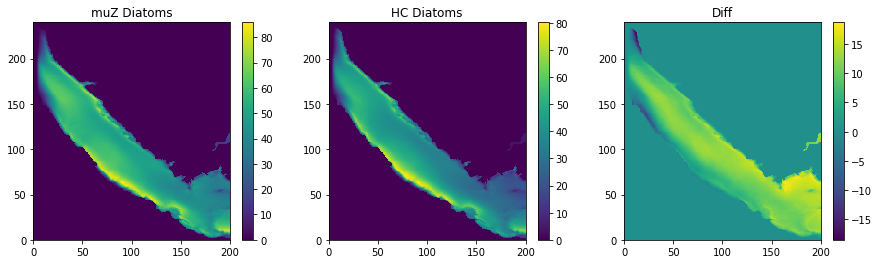

In [10]:
t0=dt.datetime.now()
fig,ax=plt.subplots(1,3,figsize=(15,4))
m0=ax[0].pcolormesh(diatomsmuZInt)
plt.colorbar(m0,ax=ax[0])
ax[0].set_title('muZ Diatoms')
m1=ax[1].pcolormesh(diatomsHCInt)
plt.colorbar(m1,ax=ax[1])
ax[1].set_title('HC Diatoms')
m2=ax[2].pcolormesh(diatomsmuZInt-diatomsHCInt)
plt.colorbar(m2,ax=ax[2])
ax[2].set_title('Diff')
t1=dt.datetime.now()
print(t1-t0)

0:00:00.075532


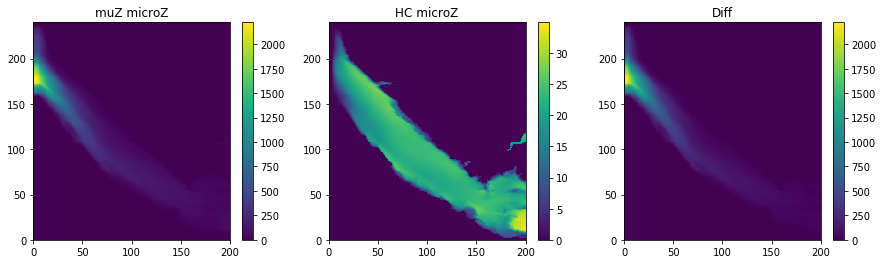

In [11]:
t0=dt.datetime.now()
fig,ax=plt.subplots(1,3,figsize=(15,4))
m0=ax[0].pcolormesh(uZmuZInt)
plt.colorbar(m0,ax=ax[0])
ax[0].set_title('muZ microZ')
m1=ax[1].pcolormesh(uZHCInt)
plt.colorbar(m1,ax=ax[1])
ax[1].set_title('HC microZ')
m2=ax[2].pcolormesh(uZmuZInt-uZHCInt)
plt.colorbar(m2,ax=ax[2])
ax[2].set_title('Diff')
t1=dt.datetime.now()
print(t1-t0)